In [44]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

# Đếm số lượng theo placeId
pipeline = [
    {"$group": {"_id": "$placeId", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 10}
]

result = list(collection.aggregate(pipeline))

for idx, item in enumerate(result, 1):
    print(f"{idx}. placeId: {item['_id']} - Số lượng: {item['count']}")


1. placeId: ChIJqSWgMcYvdTEReOwrjRd36W8 - Số lượng: 3382
2. placeId: ChIJD4OanpQvdTERh_u-NGsauZs - Số lượng: 2885
3. placeId: ChIJpdv9GNwpdTERpYUQo8r3RfA - Số lượng: 2501
4. placeId: ChIJmQa2NZUrdTERWx3Ui77zN0c - Số lượng: 2453
5. placeId: ChIJHZx_9nXVdDERkrdjx4J7zsg - Số lượng: 2359
6. placeId: ChIJmWI0qFzfdDERyycx50mNPk4 - Số lượng: 2177
7. placeId: ChIJEYXbxdoudTERmicNXLKNtCk - Số lượng: 2088
8. placeId: ChIJNbFrArYudTERGDWm6bnB-uM - Số lượng: 1787
9. placeId: ChIJC-nWiTYvdTERGMJvRSoZ2f4 - Số lượng: 1762
10. placeId: ChIJT9Pk5PsudTER3sQCMS5UC_0 - Số lượng: 1748


In [178]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

pipeline = [
    {"$match": {"publishedAtDate": {"$gte": 1514764800000, "$lt": 1704067200000}}},  # Từ 01/01/2018 đến 01/01/2024
    {"$group": {"_id": "$placeId", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 10}
]


result = list(collection.aggregate(pipeline))

for idx, item in enumerate(result, 1):
    print(f"{idx}. placeId: {item['_id']} - Số lượng: {item['count']}")


1. placeId: ChIJqSWgMcYvdTEReOwrjRd36W8 - Số lượng: 3377
2. placeId: ChIJD4OanpQvdTERh_u-NGsauZs - Số lượng: 2768
3. placeId: ChIJmQa2NZUrdTERWx3Ui77zN0c - Số lượng: 2383
4. placeId: ChIJpdv9GNwpdTERpYUQo8r3RfA - Số lượng: 2324
5. placeId: ChIJHZx_9nXVdDERkrdjx4J7zsg - Số lượng: 2168
6. placeId: ChIJmWI0qFzfdDERyycx50mNPk4 - Số lượng: 2025
7. placeId: ChIJEYXbxdoudTERmicNXLKNtCk - Số lượng: 1979
8. placeId: ChIJC-nWiTYvdTERGMJvRSoZ2f4 - Số lượng: 1648
9. placeId: ChIJT9Pk5PsudTER3sQCMS5UC_0 - Số lượng: 1630
10. placeId: ChIJ8cHCCwgvdTERS9NOJTz8Cxw - Số lượng: 1558


In [124]:
from pymongo import MongoClient
from gensim.utils import simple_preprocess

# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
mydb = client["ie212_o11_group7"]
collection = mydb["reviews"]

# Khởi tạo danh sách rỗng cho sentences và sentiment
sentences = []
sentiment = []

# Đặt placeId cụ thể bạn muốn lấy dữ liệu
place_id_to_query = "ChIJqSWgMcYvdTEReOwrjRd36W8"

# Truy vấn dữ liệu từ MongoDB và gom chúng vào các danh sách
data_from_mongo = collection.find({"placeId": place_id_to_query}, {"sentences": 1, "sentiment": 1})
for data in data_from_mongo:
    sentences.extend(data["sentences"])  # Sử dụng extend để thêm tất cả các phần tử của list vào danh sách sentences
    sentiment.extend(data["sentiment"])

# Lọc các câu có sentiment là "negative"
negative_sentences = [sentences[i] for i in range(len(sentences)) if sentiment[i] == "negative"]
positive_sentences = [sentences[i] for i in range(len(sentences)) if sentiment[i] == "positive"]
neutral_sentences = [sentences[i] for i in range(len(sentences)) if sentiment[i] == "neutral"]

# # Tiền xử lý văn bản
cleaned_negative_sentences = [' '.join(simple_preprocess(sentence, min_len=2, max_len=15)) for sentence in negative_sentences]
cleaned_positive_sentences = [' '.join(simple_preprocess(sentence, min_len=2, max_len=15)) for sentence in positive_sentences]

print(cleaned_negative_sentences)
print(cleaned_positive_sentences)

['nước uống không đa_dạng chỉ có nước_ngọt và soda chanh', 'cơm_chiên còn sống lạt', 'service và nhân_viên không được ổn lắm chưa xứng_đáng với giá tiền nửa nửa quán lề_đường mà nửa nửa của nhà_hàng', 'cũng ko nướng lần miếng mà lần nướng mieng quá lâu ko kịp nhóm tui ăn', 'bánh_mì kèm dở nha trắng nhách ỉu ỉu', 'sup bí_đỏ nguội', 'kh đc đợi hơi lâu nha', 'nhân_viên phục_vụ dễ_thương nhiệt_tình', 'đồ_ăn cũng chỉ mức bình_thường ko có gì đặc_sắc', 'tưởng_tượng không kêu thì mất thêm bao_lâu nữa', 'sẽ không bao_giờ quay lại chỗ này món ăn thì tạm thôi được cái giá mắc với phục_vụ tệ', 'hoà phục_vụ nhiệt_tình', 'đồ_ăn okela trong tầm giá điểm', 'giá_cả hợp_lý lắm', 'creme brulle khá thất_vọng vì hơi bở texture không được đặc nhưng mùi_vị rất thơm', 'ngoài_ra sốt chấm thịt phải mua thêm nếu không order set và muốn ăn thêm rau cũng phải mua thêm', 'chất_lượng đồ_ăn thì oke', 'không_gian rộng ngoài_trời hơi cũ', 'mình có ăn cả lẩu tuy_nhiên mình thì chưa ưng nước lẩu lắm mình và bạn mình đều

In [47]:
cleaned_positive_sentences = ['Đồ_ăn ngon quá', 'Phục_vụ nhiệt_tình', "Quán đẹp"]
cleaned_negative_sentences = ['Đồ_ăn dở quá', 'Phục_vụ không nhiệt_tình', "Nhân_viên thái_độ"]

In [121]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Tạo danh sách stopwords (đã có từ trước)
stop_words = set()
# Đọc từng dòng trong file stopwords.txt và thêm từ vào set stop_words
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    for line in file:
        word = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
        stop_words.add(word)

# Định nghĩa hàm combine_negation
def combine_negation(tokens):
    negation_words = {"không", "ko", "k", "kh", "không nên", "k nên", "ko nên", "chưa", "có"}
    combined_tokens = []
    i = 0
    while i < len(tokens):
        if i > 0 and i < len(tokens) - 1:
            combined_tokens.append(tokens[i - 1] + "_" + tokens[i] + "_" + tokens[i + 1])
            combined_tokens.append(tokens[i])
        i += 1
    return combined_tokens

# Áp dụng loại bỏ stop words cho mỗi câu và sau đó kết hợp từ phủ định

def create_fig_sentiments(data_list, color):
    data_list_combined = []
    for sentence in data_list:
        tokens = nltk.word_tokenize(sentence)
        tokens = [token.lower() for token in tokens if token.lower() not in stop_words]  # Loại bỏ stop words
        combined_tokens = combine_negation(tokens)
        data_list_combined.append(' '.join(combined_tokens))

    # Tạo danh sách từ từ các câu đã được kết hợp
    words = []
    for sentence in data_list_combined:
        tokens = nltk.word_tokenize(sentence)
        for token in tokens:
            words.append(token.lower())

    # Đếm số lần xuất hiện của từng từ
    word_counts = Counter(words)

    # Tạo word cloud từ danh sách các từ và số lần xuất hiện
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(dict(top_words))

    # Vẽ word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, cmap='hot')
    plt.axis('off')
    return plt


In [161]:
import plotly.express as px

In [175]:
from wordcloud import WordCloud
from collections import Counter
import nltk
import plotly.graph_objects as go

# Tạo danh sách stopwords (đã có từ trước)
stop_words = set()
# Đọc từng dòng trong file stopwords.txt và thêm từ vào set stop_words
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    for line in file:
        word = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
        stop_words.add(word)

# Định nghĩa hàm combine_negation
def combine_negation(tokens):
    negation_words = {"không", "ko", "k", "kh", "không nên", "k nên", "ko nên", "chưa", "có"}
    combined_tokens = []
    i = 0
    while i < len(tokens):
        if i > 0 and i < len(tokens) - 1:
            combined_tokens.append(tokens[i - 1] + "_" + tokens[i] + "_" + tokens[i + 1])
            combined_tokens.append(tokens[i])
        i += 1
    return combined_tokens

def create_fig_sentiments(data_list, color_c):
    data_list_combined = []
    for sentence in data_list:
        tokens = nltk.word_tokenize(sentence)
        tokens = [token.lower() for token in tokens if token.lower() not in stop_words]  # Loại bỏ stop words
        combined_tokens = combine_negation(tokens)
        data_list_combined.extend(combined_tokens)
    
    # Đếm tần suất xuất hiện của các từ
    word_freq = Counter(data_list_combined)
    most_common_words = word_freq.most_common(20)  # Lấy 20 từ xuất hiện nhiều nhất
    
    # Tạo biểu đồ cột
    words, frequencies = zip(*most_common_words)
    fig = go.Figure(data=[go.Bar(x=words, y=frequencies, text=frequencies,
            textposition='auto', marker_color=color_c)]) # Chú ý marker_color ở đây
    fig.update_layout(title_text='Most Common Words', xaxis_title="Words", yaxis_title="Frequency")
    return fig


In [176]:
# Sử dụng hàm với màu vidiris
create_fig_sentiments(cleaned_positive_sentences, "lightsalmon")

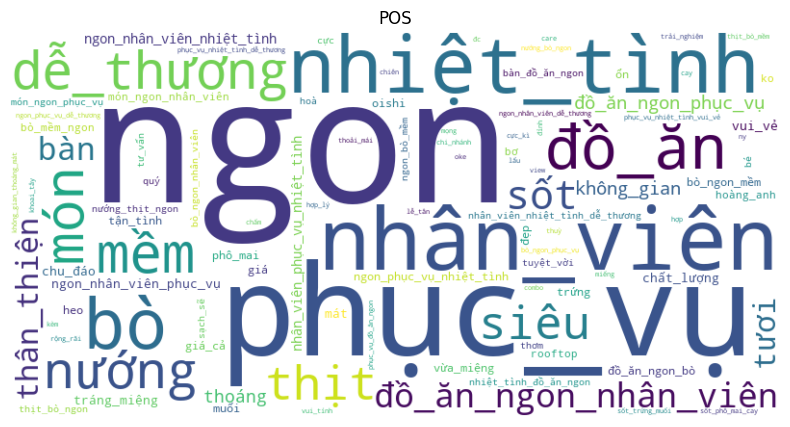

In [75]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Định nghĩa hàm combine_position
def combine_position(tokens):
    position_words = {"không", "ko", "k", "kh", "không nên", "k nên", "ko nên", "chưa", "có"}
    combined_tokens = []
    i = 0
    while i < len(tokens):
        if i > 0 and i < len(tokens) - 1:
            combined_tokens.append(tokens[i - 1] + "_" + tokens[i] + "_" + tokens[i + 1])
            combined_tokens.append(tokens[i])
        i += 1
    return combined_tokens

# Tạo danh sách stopwords (đã có từ trước)
stop_words = set()

# Đọc từng dòng trong file stopwords.txt và thêm từ vào set stop_words
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as file:
    for line in file:
        word = line.strip()  # Loại bỏ khoảng trắng và ký tự xuống dòng
        stop_words.add(word)

# Áp dụng loại bỏ stop words cho mỗi câu và sau đó kết hợp từ phủ định
cleaned_positive_sentences_combined = []
for sentence in cleaned_positive_sentences:
    tokens = nltk.word_tokenize(sentence)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]  # Loại bỏ stop words
    combined_tokens = combine_position(tokens)
    cleaned_positive_sentences_combined.append(' '.join(combined_tokens))

# Tạo danh sách từ từ các câu đã được kết hợp
words = []
for sentence in cleaned_positive_sentences_combined:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        words.append(token.lower())

# Đếm số lần xuất hiện của từng từ
word_counts = Counter(words)

# Tạo word cloud từ danh sách các từ và số lần xuất hiện
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_counts)

# Vẽ word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('POS')
plt.show()
